<a href="https://colab.research.google.com/github/shevochkkaaa/lab-robota/blob/main/%D0%94%D0%BE%D0%B1%D1%80%D0%BE_%D0%BF%D0%BE%D0%B6%D0%B0%D0%BB%D0%BE%D0%B2%D0%B0%D1%82%D1%8C_%D0%B2_Colaboratory!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 11, Шевченко Валерія, ФІТ 2-8

Коефіцієнти лінійної апроксимації: a1 = -0.7330402517305232, a0 = 0.7937114090320855
Коефіцієнти параболічної апроксимації: a2 = 0.7124445211372228, a1 = -1.5167292249814683, a0 = 0.9504492036822737


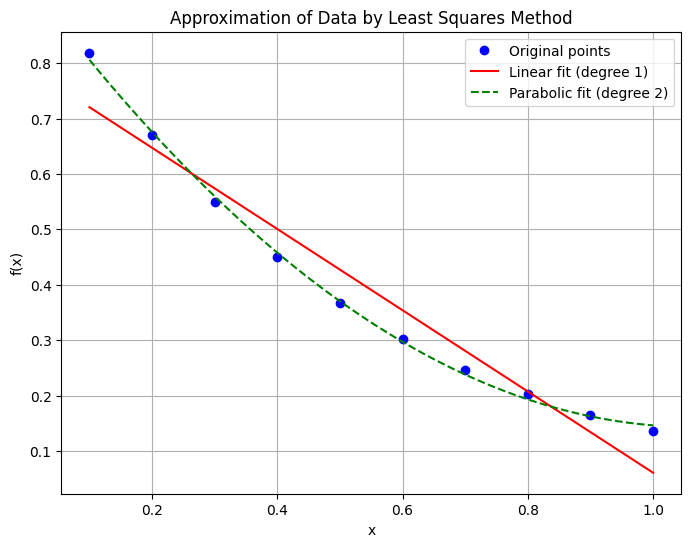

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Вхідні дані
x_values = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Функція f(x) = e^(-2x)
def f(x):
    return np.exp(-2 * x)

# Обчислення значень функції для кожного x
y_values = f(x_values)

# Формування таблиці зі значеннями функції
data_table = pd.DataFrame({
    'i': np.arange(len(x_values)),
    'x_i': x_values,
    'y_i = f(x_i)': y_values
})

# Апроксимація прямою (поліном 1-го степеня)
linear_coeff = np.polyfit(x_values, y_values, 1)

# Апроксимація параболою (поліном 2-го степеня)
parabolic_coeff = np.polyfit(x_values, y_values, 2)

# Генерація значень для побудови графіків
x_fit = np.linspace(0.1, 1.0, 100)
y_linear_fit = np.polyval(linear_coeff, x_fit)
y_parabolic_fit = np.polyval(parabolic_coeff, x_fit)

# Виведення коефіцієнтів для обох моделей
print(f"Коефіцієнти лінійної апроксимації: a1 = {linear_coeff[0]}, a0 = {linear_coeff[1]}")
print(f"Коефіцієнти параболічної апроксимації: a2 = {parabolic_coeff[0]}, a1 = {parabolic_coeff[1]}, a0 = {parabolic_coeff[2]}")

# Побудова графіків
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, 'bo', label="Original points")
plt.plot(x_fit, y_linear_fit, 'r-', label="Linear fit (degree 1)")
plt.plot(x_fit, y_parabolic_fit, 'g--', label="Parabolic fit (degree 2)")

plt.title("Approximation of Data by Least Squares Method")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()
